In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin

In [4]:
sX1 = np.array([1,1,-1,1])
sX2 = np.array([-1,1,-1,1])
sX3 = np.array([-1,-1,1,1])
sX4 = np.array([1,-1,1,1])

In [28]:
def projection(point3D):
    return np.array([point3D[0]/point3D[2],point3D[1]/point3D[2],1])

**_Definition Camera_**<br>**parametre extrasèque**

In [92]:
from math import radians


orientation = {'alpha' : radians(45.0) , 'beta' : radians(45.0), 'gamma' : radians(45.0)}
positionCamera = np.array([[0,0,10]])

**Parametre intrasèque**

In [93]:
alphaU = 700
alphaV = 700
u0 = 400
v0 = 300

K = np.array([[alphaU,0,u0],[0,alphaV,v0],[0,0,1]])

In [94]:
Ralpha = np.array([[1, 0, 0], [0, cos(orientation['alpha']), -sin(orientation['alpha'])], [0, sin(orientation['alpha']), cos(orientation['alpha'])]])
Rbeta = np.array([[cos(orientation['beta']), 0, sin(orientation['beta'])], [0, 1, 0], [-sin(orientation['beta']), 0, cos(orientation['beta'])]])
Rgamma = np.array([[cos(orientation['gamma']), -sin(orientation['gamma']), 0], [sin(orientation['gamma']), cos(orientation['gamma']), 0], [0, 0, 1]])

cRs = np.dot(Rgamma, Rbeta, Ralpha)

In [95]:
cos(orientation['alpha'])

0.7071067811865476

In [96]:
cMs = np.concatenate((cRs, positionCamera.T), axis=1)
cMs = np.concatenate((cMs, np.array([[0, 0, 0, 1]])), axis=0)

In [97]:
u1 = np.dot(K,projection(np.dot(cMs,sX1)))[:2]
u2 = np.dot(K,projection(np.dot(cMs,sX2)))[:2]
u3 = np.dot(K,projection(np.dot(cMs,sX3)))[:2]
u4 = np.dot(K,projection(np.dot(cMs,sX4)))[:2]

(0.0, 600.0)

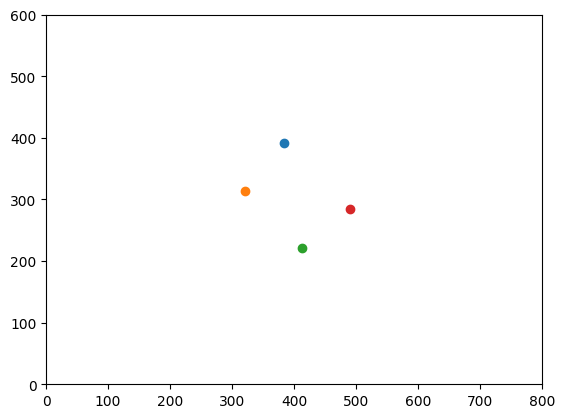

In [98]:
plt.scatter(u1[0],u1[1])
plt.scatter(u2[0],u2[1])
plt.scatter(u3[0],u3[1])
plt.scatter(u4[0],u4[1])

plt.xlim(0,800)
plt.ylim(0,600)